## Time Series Analysis of Household Electric Power Consumption

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [40]:
df = pd.read_csv(r"Datasets\household_power_consumption.txt", sep = ";", low_memory=False)
df.head(20)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## 1. converting to datetime:

In [3]:
# this code is used to check the column names , i find it easier to check it in this way before starting working with the columns

In [4]:
print(df.columns)

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [5]:
# this line of the code Combines date and time into one string column
df['Datetime'] = df['Date'] + ' ' + df['Time']

In [6]:
# in this line i have converted the new column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d/%m/%Y %H:%M:%S')

In [7]:
# this line sets the datetime column as the index
df.set_index('Datetime', inplace=True)

In [8]:
#Show the first 20 rows
df.head(20)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
2006-12-16 17:29:00,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
2006-12-16 17:30:00,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
2006-12-16 17:31:00,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
2006-12-16 17:32:00,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0


## 2. Slicing time range 

***1.sclincing by specific time range***

In [9]:
between_6_7 = df.between_time('18:00', '19:00').head()
print("Records between 18:00 and 19:00:")
between_6_7


Records between 18:00 and 19:00:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 18:00:00,16/12/2006,18:00:00,2.790,0.180,237.520,11.800,0.000,0.000,18.0
2006-12-16 18:01:00,16/12/2006,18:01:00,2.624,0.144,238.200,11.000,0.000,0.000,17.0
2006-12-16 18:02:00,16/12/2006,18:02:00,2.772,0.118,238.280,11.600,0.000,0.000,17.0
2006-12-16 18:03:00,16/12/2006,18:03:00,3.740,0.108,236.930,16.400,0.000,16.000,18.0
2006-12-16 18:04:00,16/12/2006,18:04:00,4.928,0.202,235.010,21.000,0.000,37.000,16.0


***2.Slicing by a specific month***

In [10]:
feb_2010 = df.loc['2010-02']
print("Data for February 2010:")
feb_2010


Data for February 2010:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2010-02-01 00:00:00,1/2/2010,00:00:00,0.346,0.000,245.130,1.400,0.000,0.000,1.0
2010-02-01 00:01:00,1/2/2010,00:01:00,0.346,0.000,245.290,1.400,0.000,0.000,1.0
2010-02-01 00:02:00,1/2/2010,00:02:00,0.344,0.000,244.200,1.400,0.000,0.000,0.0
2010-02-01 00:03:00,1/2/2010,00:03:00,0.344,0.000,244.660,1.400,0.000,0.000,1.0
2010-02-01 00:04:00,1/2/2010,00:04:00,0.344,0.000,244.500,1.400,0.000,0.000,1.0
...,...,...,...,...,...,...,...,...,...
2010-02-28 23:55:00,28/2/2010,23:55:00,0.488,0.322,240.480,2.400,0.000,1.000,1.0
2010-02-28 23:56:00,28/2/2010,23:56:00,0.486,0.322,240.530,2.400,0.000,2.000,0.0
2010-02-28 23:57:00,28/2/2010,23:57:00,0.488,0.326,241.250,2.400,0.000,1.000,1.0


***3.Slice between 6 Months***

In [11]:
print("First 5 records from Jan 2007 to June 2007:")
df.loc['2007-01':'2007-06'].head()


First 5 records from Jan 2007 to June 2007:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2007-01-01 00:00:00,1/1/2007,00:00:00,2.580,0.136,241.970,10.600,0.000,0.000,0.0
2007-01-01 00:01:00,1/1/2007,00:01:00,2.552,0.100,241.750,10.400,0.000,0.000,0.0
2007-01-01 00:02:00,1/1/2007,00:02:00,2.550,0.100,241.640,10.400,0.000,0.000,0.0
2007-01-01 00:03:00,1/1/2007,00:03:00,2.550,0.100,241.710,10.400,0.000,0.000,0.0
2007-01-01 00:04:00,1/1/2007,00:04:00,2.554,0.100,241.980,10.400,0.000,0.000,0.0


***4.Slice by a Year [2010]***

In [12]:
data_of_year_2010 = df.loc['2010']
print("all data records during the year of 2010:")
data_of_year_2010

all data records during the year of 2010:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2010-01-01 00:00:00,1/1/2010,00:00:00,1.790,0.236,240.650,7.400,0.000,0.000,18.0
2010-01-01 00:01:00,1/1/2010,00:01:00,1.780,0.234,240.070,7.400,0.000,0.000,18.0
2010-01-01 00:02:00,1/1/2010,00:02:00,1.780,0.234,240.150,7.400,0.000,0.000,19.0
2010-01-01 00:03:00,1/1/2010,00:03:00,1.746,0.186,240.260,7.200,0.000,0.000,18.0
2010-01-01 00:04:00,1/1/2010,00:04:00,1.686,0.102,240.120,7.000,0.000,0.000,18.0
...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


### 3. Resampling 

***weekly sum in numerical columns***

In [13]:
df_weekly_sum = df.resample('W').sum()
print(df_weekly_sum.head())

                                                         Date  \
Datetime                                                        
2006-12-17  16/12/200616/12/200616/12/200616/12/200616/12/...   
2006-12-24  18/12/200618/12/200618/12/200618/12/200618/12/...   
2006-12-31  25/12/200625/12/200625/12/200625/12/200625/12/...   
2007-01-07  1/1/20071/1/20071/1/20071/1/20071/1/20071/1/20...   
2007-01-14  8/1/20078/1/20078/1/20078/1/20078/1/20078/1/20...   

                                                         Time  \
Datetime                                                        
2006-12-17  17:24:0017:25:0017:26:0017:27:0017:28:0017:29:...   
2006-12-24  00:00:0000:01:0000:02:0000:03:0000:04:0000:05:...   
2006-12-31  00:00:0000:01:0000:02:0000:03:0000:04:0000:05:...   
2007-01-07  00:00:0000:01:0000:02:0000:03:0000:04:0000:05:...   
2007-01-14  00:00:0000:01:0000:02:0000:03:0000:04:0000:05:...   

                                          Global_active_power  \
Datetime               

***Resample Global_active_power by weekly sum and monthly average***

***I will apply W rsampling to global active power column to know how much electricity was used each week.***

In [20]:
weekly_active_power = df['Global_active_power'].resample('W').sum()
weekly_active_power

Datetime
2006-12-17     4599.636
2006-12-24    17477.128
2006-12-31    19736.518
2007-01-07    14961.068
2007-01-14    16176.334
                ...    
2010-10-31     9666.352
2010-11-07    11638.018
2010-11-14    13466.152
2010-11-21    11159.630
2010-11-28     8334.588
Freq: W-SUN, Name: Global_active_power, Length: 207, dtype: float64

***I will use Monthly-Resample and calculate the average power used each month.***

In [21]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce') #used this code to replace invalid values with Nan values
monthly_active_power =df['Global_active_power'].resample('M').mean()
monthly_active_power.head(10)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_12784\142949112.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_active_power =df['Global_active_power'].resample('M').mean()


Datetime
2006-12-31    1.901295
2007-01-31    1.546034
2007-02-28    1.401084
2007-03-31    1.318627
2007-04-30    0.891189
2007-05-31    0.985862
2007-06-30    0.826814
2007-07-31    0.667367
2007-08-31    0.764186
2007-09-30    0.969318
Freq: ME, Name: Global_active_power, dtype: float64

### Visualization of Data

In [16]:
import matplotlib.pyplot as plt

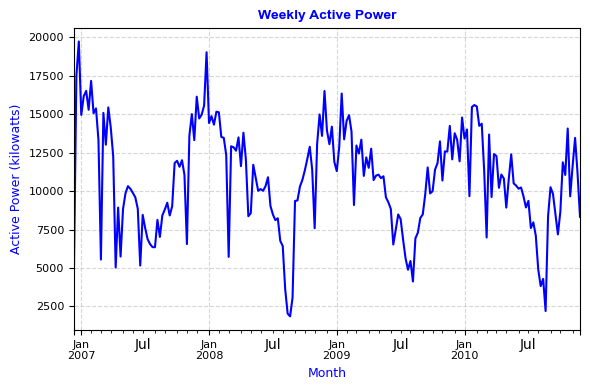

In [33]:
plt.figure(figsize=(6, 4))
weekly_active_power.plot(color="blue")
plt.title('Weekly Active Power', fontsize=10, color='blue', fontweight='bold', fontname='Arial')
plt.xlabel('Month', fontsize=9, color="blue")
plt.ylabel('Active Power (kilowatts)', fontsize=9, color="blue")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

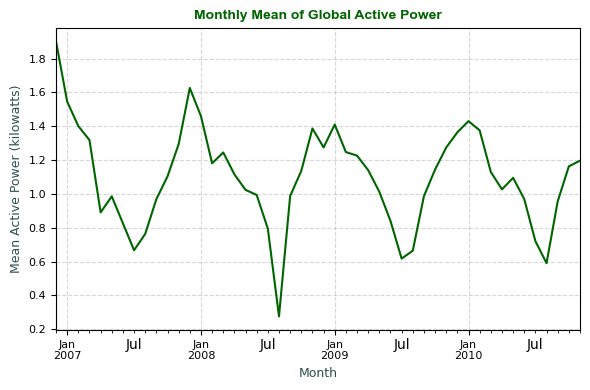

In [34]:
plt.figure(figsize=(6, 4))
monthly_active_power.plot(color='darkgreen')
plt.title('Monthly Mean of Global Active Power', fontsize=10, color='darkgreen', fontweight='bold', fontname='Arial')
plt.xlabel('Month', fontsize=9, color='darkslategray')
plt.ylabel('Mean Active Power (kilowatts)', fontsize=9, color='darkslategray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()